# *************EDA ON PUBG datasets by( MD ZEESHAN ARIF)**************

 #                                               (29-05-21)

# Details about the data:

### groupId -Integer ID to identify a group within a match. If the same group of players plays in different matches,    they will have a different groupId each time.
### matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.
### assists - Number of enemy players this player damaged that were killed by teammates.
### boosts - Number of boost items used.
### damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
### DBNOs - Number of enemy players knocked.
### headshotKills - Number of enemy players killed with headshots.
### heals - Number of healing items used.
### killPlace - Ranking in match of number of enemy players killed.
### killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
### kills - Number of enemy players killed.
### killStreaks - Max number of enemy players killed in a short amount of time.
### longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.
### maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
### numGroups - Number of groups we have data for in the match.
### revives - Number of times this player revived teammates.
### rideDistance - Total distance traveled in vehicles measured in meters.
### roadKills - Number of kills while in a vehicle.
### swimDistance - Total distance traveled by swimming measured in meters.
### teamKills - Number of times this player killed a teammate.
### vehicleDestroys - Number of vehicles destroyed.
### walkDistance - Total distance traveled on foot measured in meters.
### weaponsAcquired - Number of weapons picked up.
### winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
### winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

# importing libraries for describing and visualizing the datas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# loading the pubg data

In [2]:
df=pd.read_csv(r"C:\Users\AwesomeAkbar\Desktop\data.csv")

<IPython.core.display.Javascript object>

In [3]:
# now lets check the first five rows of the data 

pd.set_option("display.max_columns",50)   # to display all the columns 
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,0,0,0.000,1403,squad-fpp,31,29,-1,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,0,0,0.000,1971,squad-fpp,30,30,-1,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,0,0,0.000,1741,solo-fpp,96,89,1516,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,0,0,0.000,1738,squad-fpp,28,27,-1,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,1,1,7.737,2193,solo,99,95,1482,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


# lets perform some EDA on the dataset to know some useful insights from the data

In [4]:
# checking the shape of the data
df.shape

(1111742, 30)

In [5]:
# summary of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [6]:
# checking the null values:
df.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
# We have 1 Null values in our target variable and lets check the data related to that:
df[df['winPlacePerc'].isna() == True]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
184895,2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


# description of numerical data:

In [8]:
# lets check the descriptions of the data in one go:
df.describe().apply(lambda x:x.apply("{0:.5f}".format))

,Unnamed: 0,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111742.00000,1111741.00000
mean,2224361.62780,0.23367,1.10666,130.73641,0.65736,0.22665,1.37035,47.59562,504.43012,0.92551,0.54485,22.99814,1579.34783,44.50584,43.00693,892.79020,0.16418,604.21422,0.00355,4.54507,0.02401,0.00783,1153.28208,3.65968,605.70655,0.47279
std,1283878.63498,0.58940,1.71605,171.17554,1.14602,0.60334,2.68382,27.47025,627.40062,1.56222,0.71290,51.06977,258.93477,23.81989,23.27841,736.64434,0.47042,1495.94949,0.07385,30.61857,0.16789,0.09195,1182.78763,2.46180,739.51400,0.30738
min,6.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,9.00000,1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1112440.25000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,24.00000,0.00000,0.00000,0.00000,0.00000,1367.00000,28.00000,27.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,155.20000,2.00000,0.00000,0.20000
50%,2223772.50000,0.00000,0.00000,84.11000,0.00000,0.00000,0.00000,47.00000,0.00000,0.00000,0.00000,0.00000,1438.00000,30.00000,30.00000,1444.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,684.10000,3.00000,0.00000,0.45830
75%,3337953.75000,0.00000,2.00000,185.90000,1.00000,0.00000,2.00000,71.00000,1171.00000,1.00000,1.00000,21.33000,1851.00000,49.00000,47.00000,1500.00000,0.00000,0.07927,0.00000,0.00000,0.00000,0.00000,1975.00000,5.00000,1495.00000,0.74070
max,4446964.00000,17.00000,24.00000,5990.00000,35.00000,64.00000,73.00000,100.00000,2170.00000,72.00000,20.00000,1040.00000,2237.00000,100.00000,100.00000,5910.00000,23.00000,35400.00000,14.00000,2668.00000,10.00000,5.00000,13960.00000,177.00000,2002.00000,1.00000


# description of categorical data:

In [9]:
df.describe(include="object")

,Id,groupId,matchId,matchType
count,1111742,1111742,1111742,1111742
unique,1111742,870622,47951,16
top,87b023fca6653d,14d6b54cdec6bc,f7182fcc0d8cc8,squad-fpp
freq,1,17,42,438781


In [10]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [11]:
# separating all the categorical datas:

categorical_col=df.loc[:,["Id","groupId","matchId","matchType"]]
categorical_col.shape
    

(1111742, 4)

In [12]:
# separating all the numerical datas:

numerical_col=df.loc[:,['Unnamed: 0', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc']]

In [13]:
numerical_col.shape

(1111742, 26)

# observations:


In [14]:
# 1) total number of rows=1111742 and total number of columns=30
# 2) we have (winPlacePerc) as target column
# 3) we have one null value in the target column
# 4) there are 26 numerical columns and 4 categorical columns


In [15]:
#FIND OUT UNIQUE COUNT OF MATCH ID & GROUP ID
for i in ['Id','groupId','matchId']:
    print(f'unique [{i}] count:', df[i].nunique())

unique [Id] count: 1111742
unique [groupId] count: 870622
unique [matchId] count: 47951


# checking the outliers:

Unnamed: 0


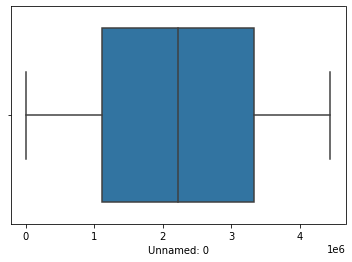

assists


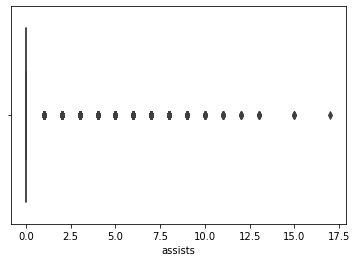

boosts


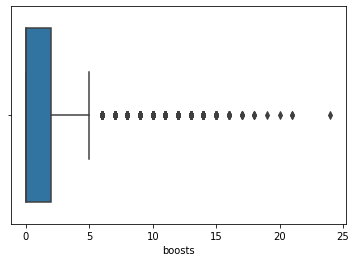

damageDealt


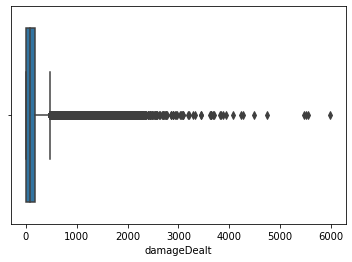

DBNOs


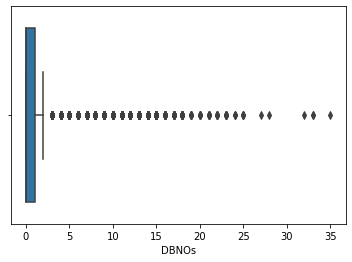

headshotKills


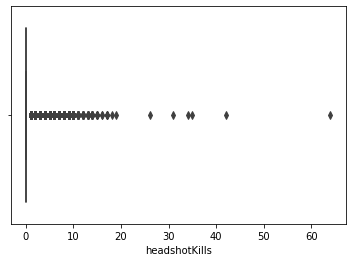

heals


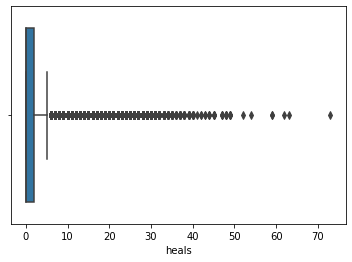

killPlace


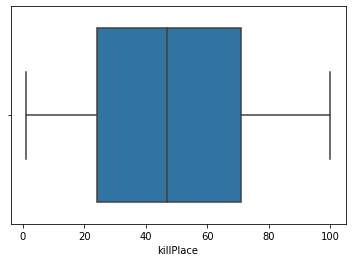

killPoints


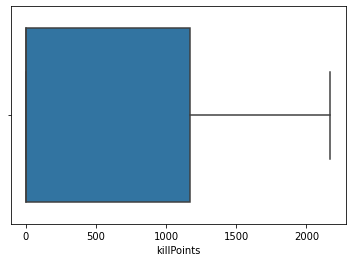

kills


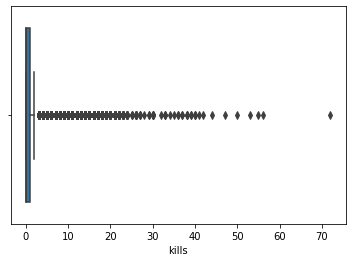

killStreaks


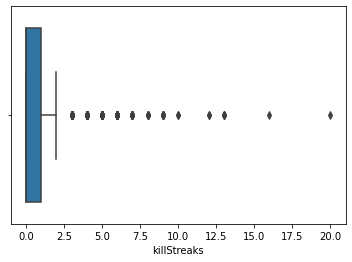

longestKill


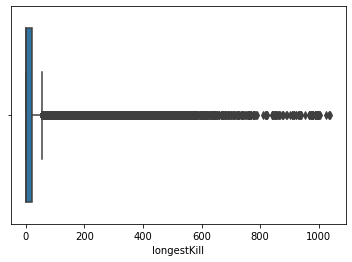

matchDuration


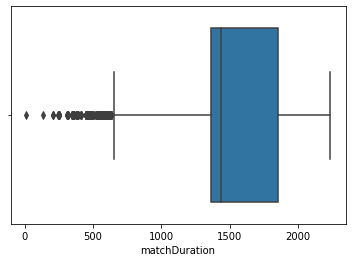

maxPlace


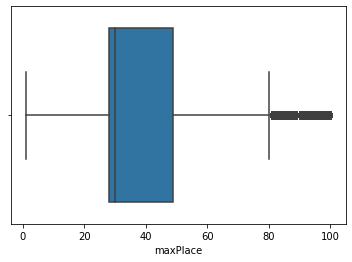

numGroups


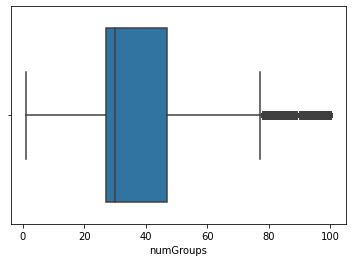

rankPoints


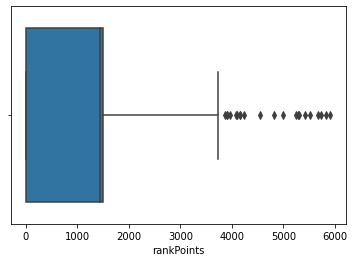

revives


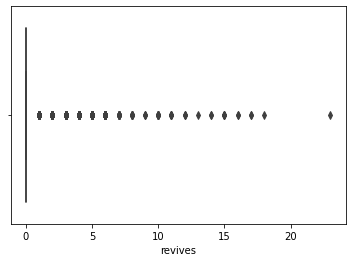

rideDistance


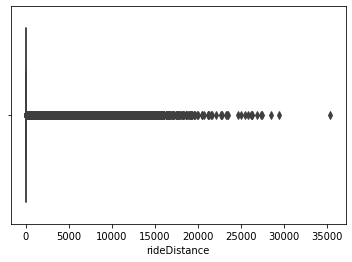

roadKills


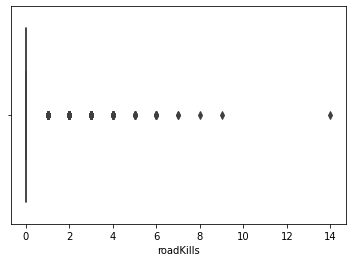

swimDistance


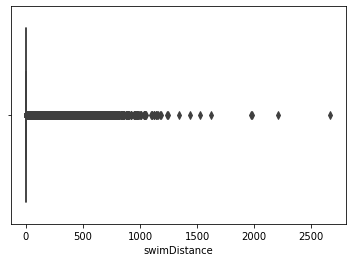

teamKills


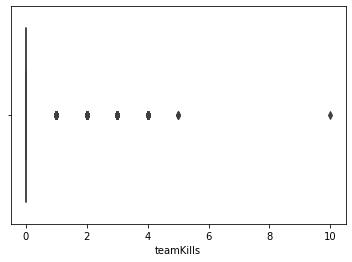

vehicleDestroys


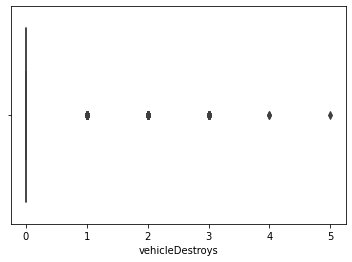

walkDistance


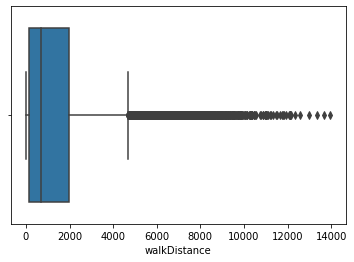

weaponsAcquired


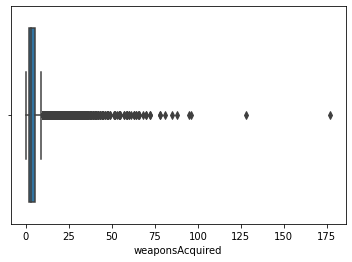

winPoints


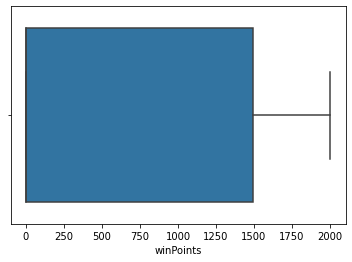

winPlacePerc


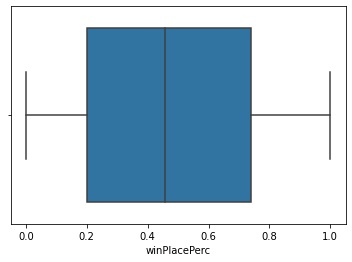

In [21]:
for i in numerical_col:
    print(i)
    plt.figure
    sns.boxplot(numerical_col[i])
    plt.show()

# observations from boxplot:

In [ ]:
# 1)outliers in assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killstreak,longestKill,matchDuration,maxPlace,
#    numGroups,rankpoints,revives,ridedistance,roadkills,swimdistance,teamkills,vehicle distroys,walkdistance,weapon acquired,
#    


# univariate and bivariate analysis :

Unnamed: 0
3.337843019023307e-06


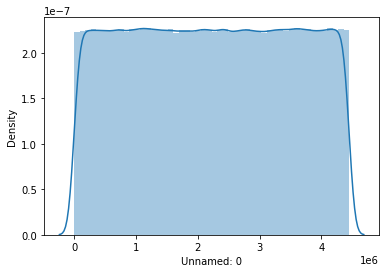

assists
3.608616927828765


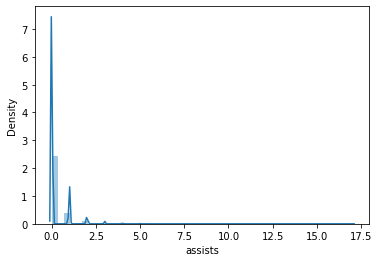

boosts
1.9532890659097097


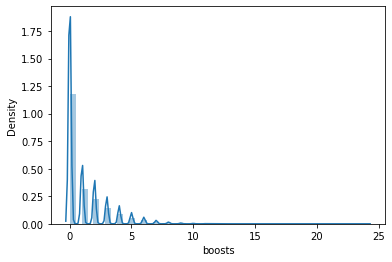

damageDealt
3.014088692493925


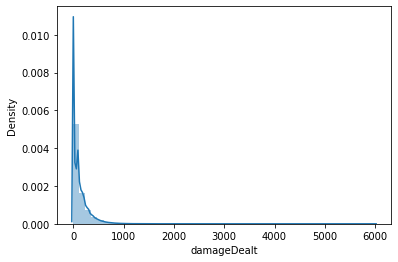

DBNOs
3.185755248269476


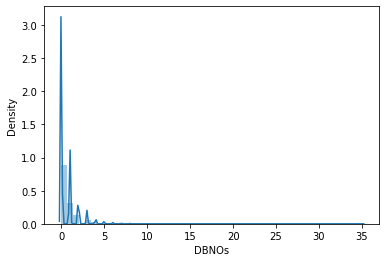

headshotKills
6.048756125455073


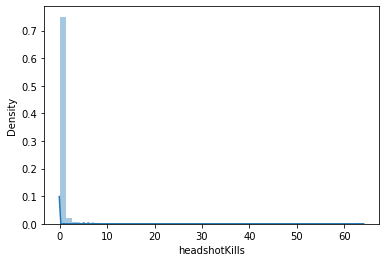

heals
3.4766345500817506


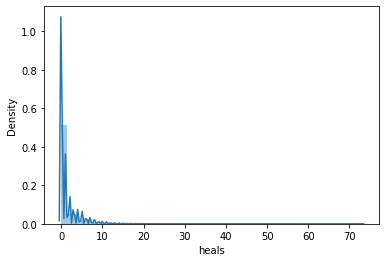

killPlace
0.02763533429517597


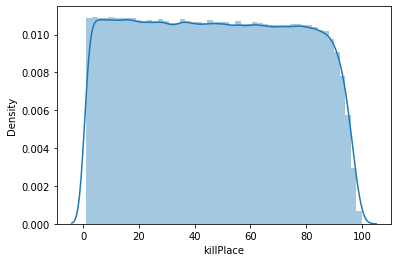

killPoints
0.5209892177521868


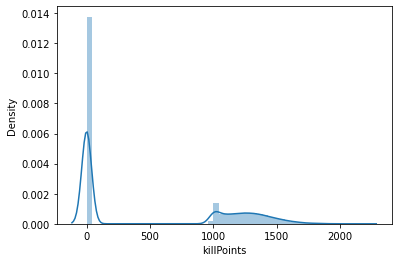

kills
3.4522608478296046


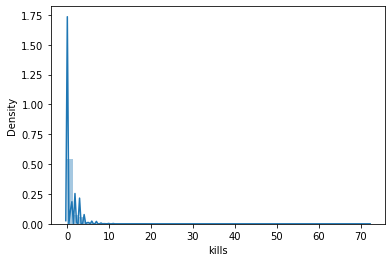

killStreaks
1.286746112462675


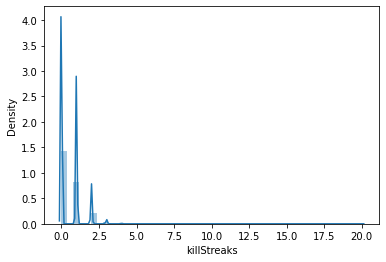

longestKill
3.999407484528852


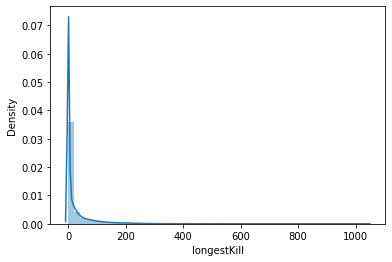

matchDuration
0.27404557562290566


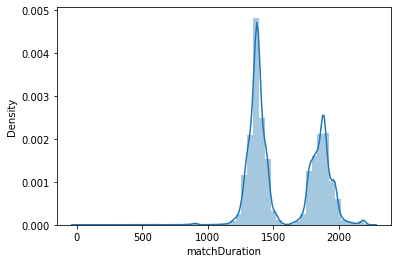

maxPlace
1.354714461277479


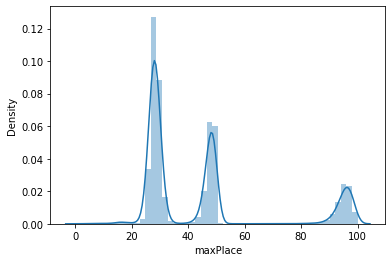

numGroups
1.3617492805689984


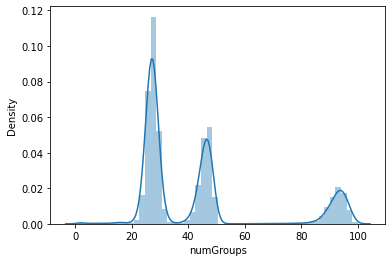

rankPoints
-0.3676213809601592


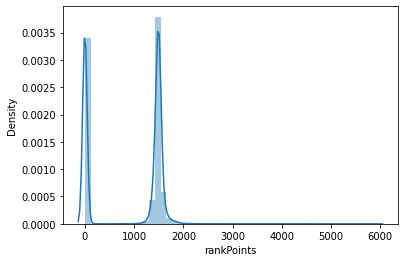

revives
4.018123572906183


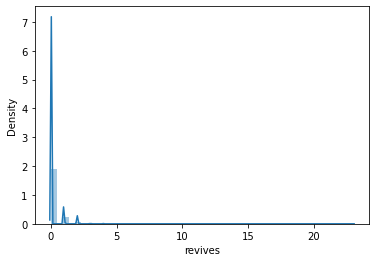

rideDistance
3.3357322122233617


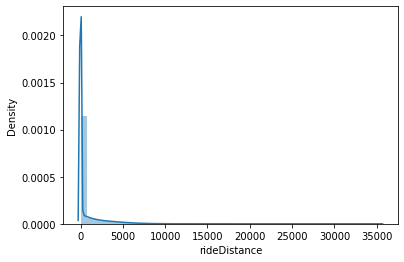

roadKills
35.61297778240619


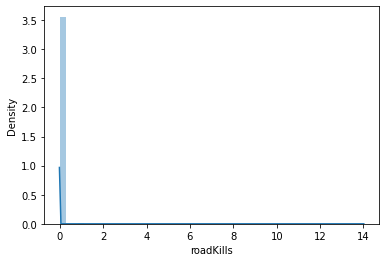

swimDistance
13.98820403787298


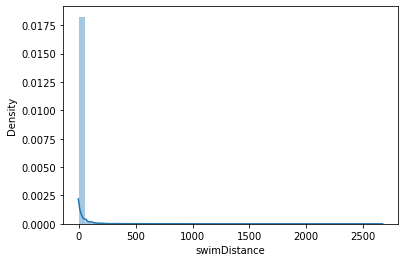

teamKills
8.17480317962639


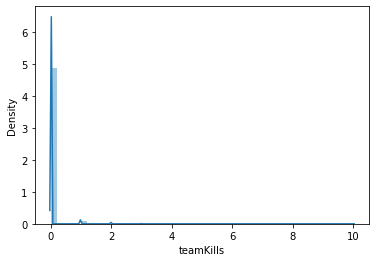

vehicleDestroys
12.744527187285144


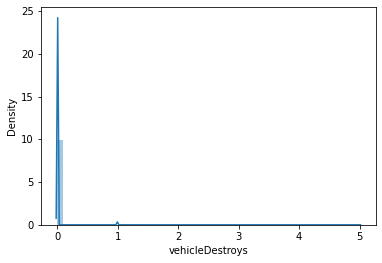

walkDistance
1.0910252693271258


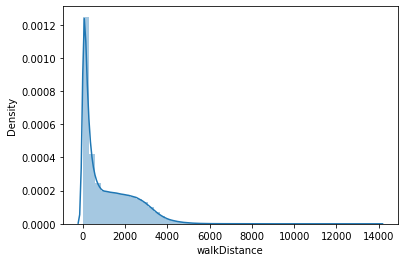

weaponsAcquired
2.6098488536792983


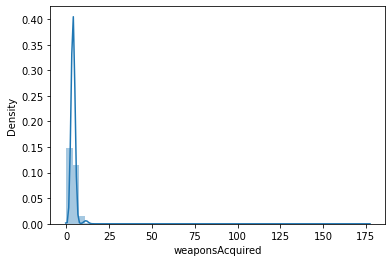

winPoints
0.40740080569855175


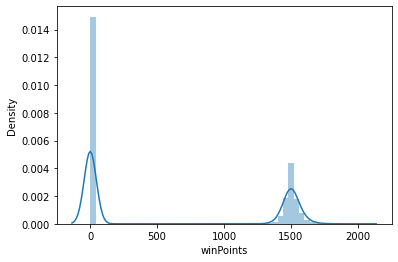

winPlacePerc
nan


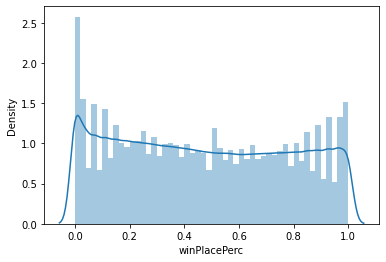

In [19]:
from scipy.stats import skew
for i in numerical_col:
    print(i)
    print(skew(numerical_col[i]))
    
    plt.figure
    sns.distplot(numerical_col[i])
    plt.show()
    

# observations:


In [ ]:
# **************list of columns which are having high skewness are***********

#  assists,boosts,damageDealt(positive skew),DNBOs (right skew),headshotKills(right skew)
#  heals ( right skew),kills (right skew),longestkill (right skew),rideDistance(right skew),swimDistance(right skew),teamKills(right skew),
#  vehicleDestroys(right skew),walkDistance(right skew),weaponsAcquired(right skew),

# checking the correlation:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

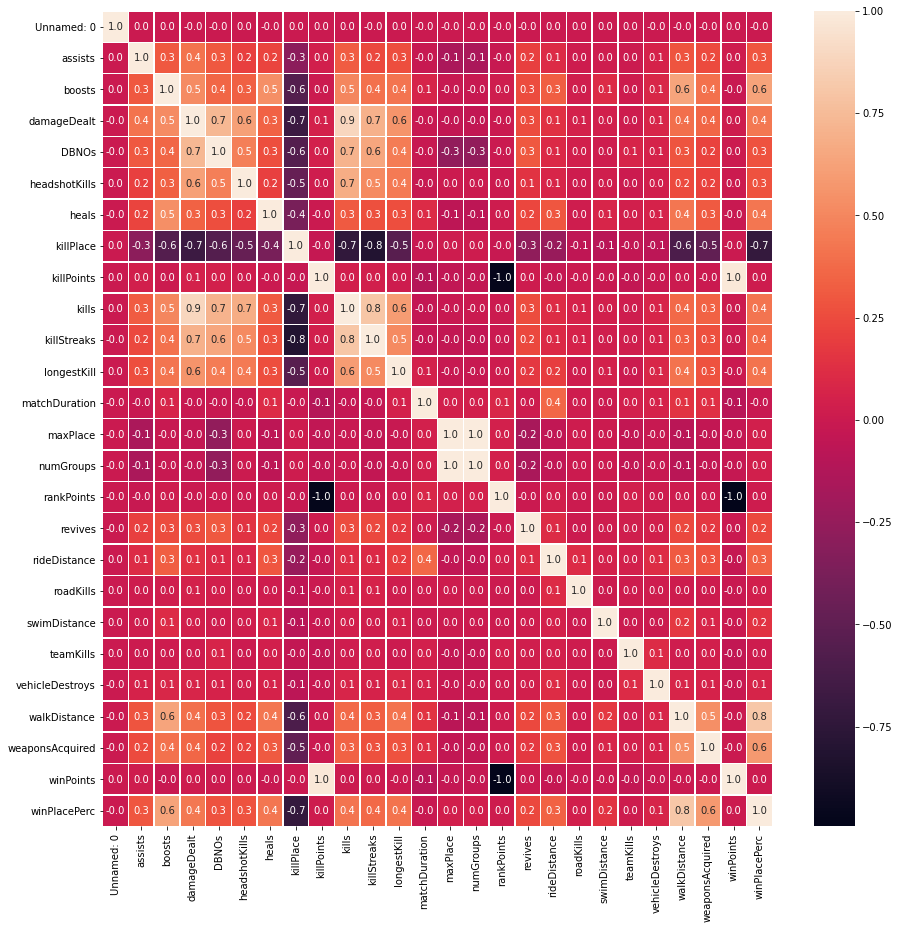

In [3]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# lets check top 5 most correlated variables with columns:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

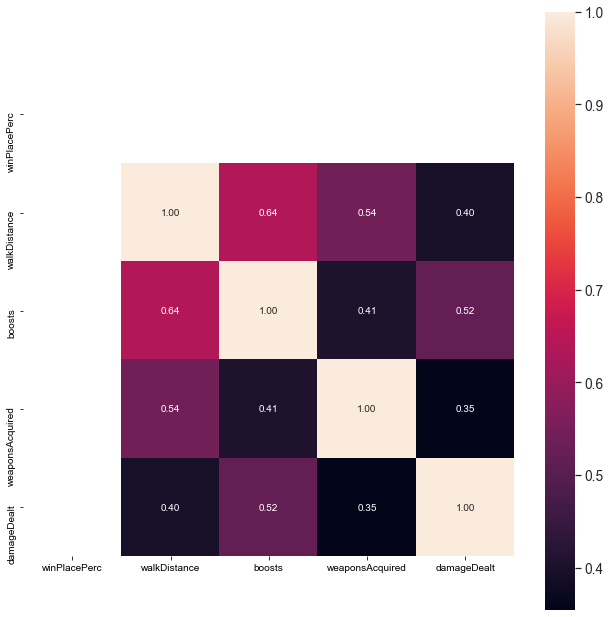

In [4]:
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = df.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c:\users\awesomeakbar\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>

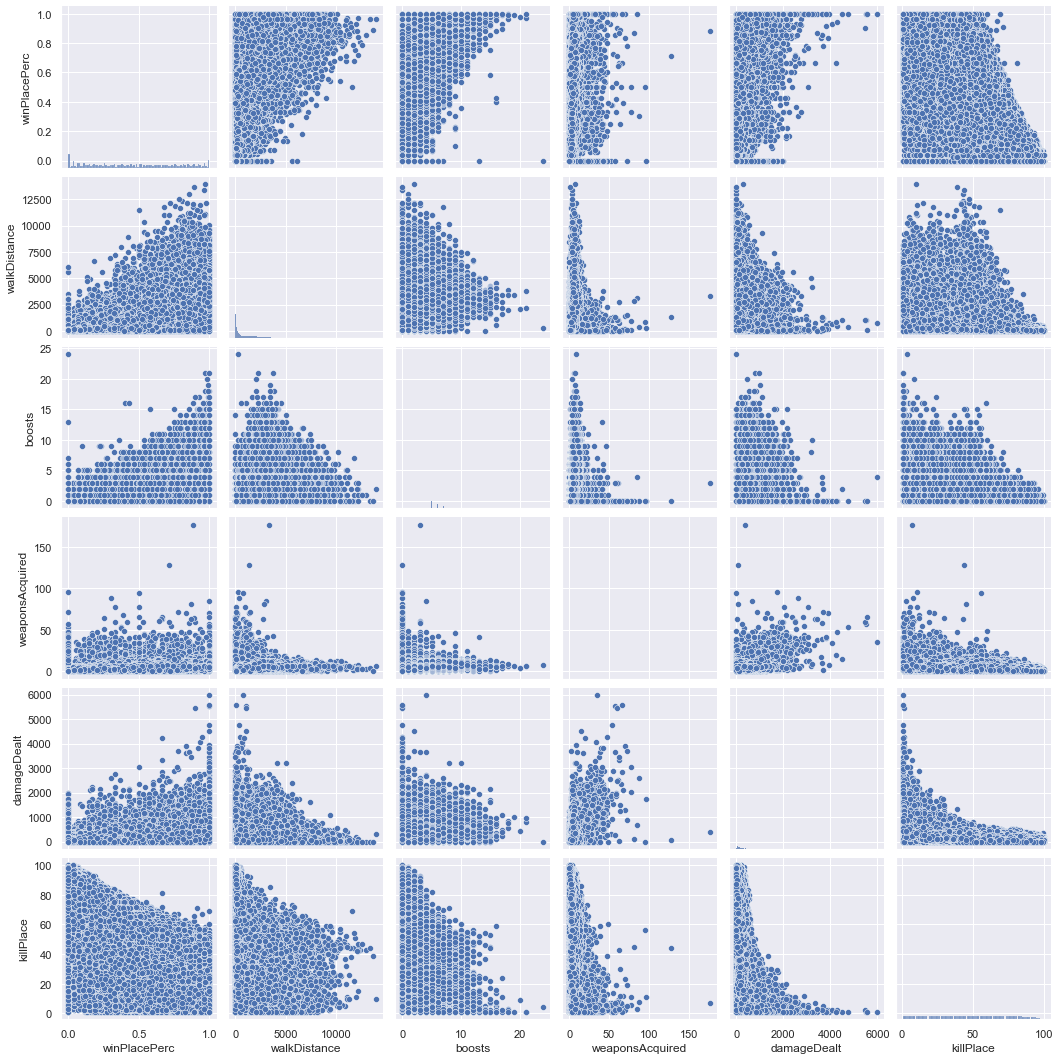

In [5]:
# now plotting the pairplot between top 5 columns which are having high correlation values:

sns.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']
sns.pairplot(df[cols], size = 2.5)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

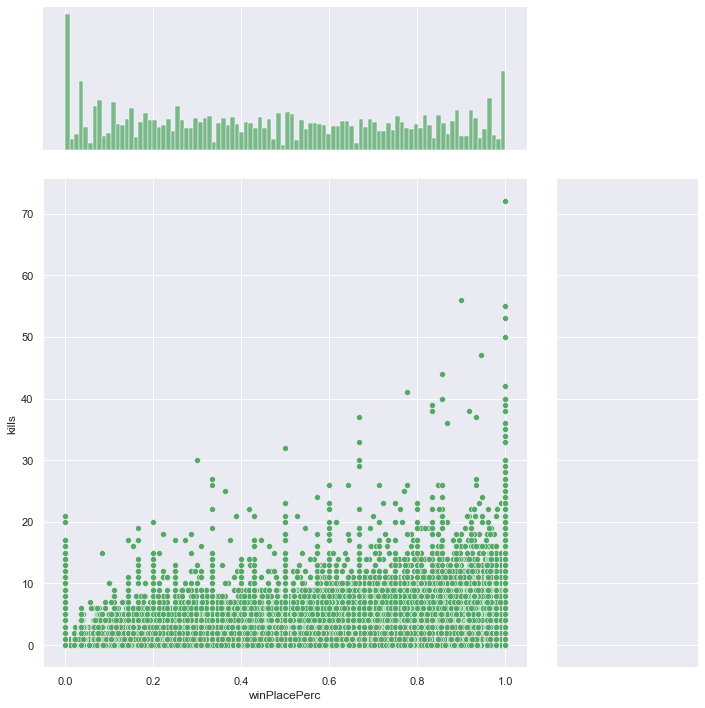

In [6]:
# Plotting win placement percentage vs kills.
sns.jointplot(x='winPlacePerc',y='kills',data=df,height=10,ratio=3,color='g')
plt.show()

In [ ]:
# Apparentrly killing has a correlation with winning. Finally let's group players based on kills (0 kills, 1-2 kills, 3-5 kills, 6-10 kills and 10+ kills).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

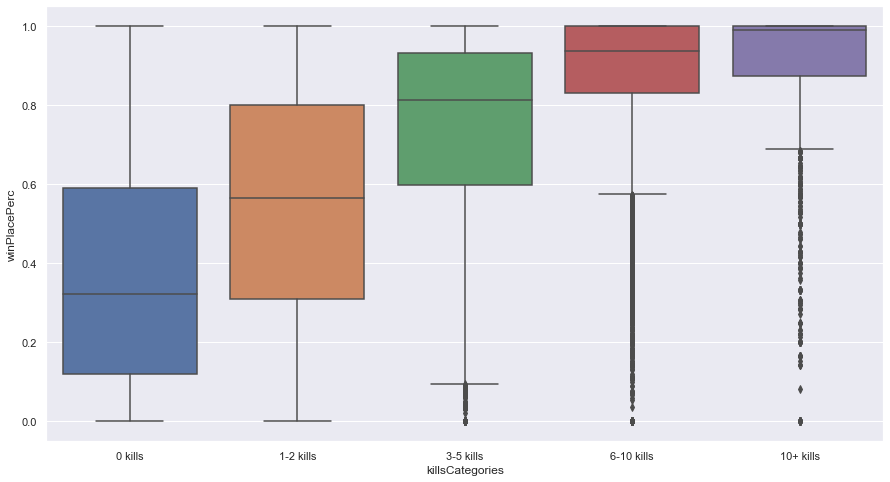

In [7]:
kills=df.copy()
kills['killsCategories']=pd.cut(kills['kills'],[-1,0,2,5,10,80],labels=['0 kills','1-2 kills','3-5 kills','6-10 kills','10+ kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x='killsCategories',y='winPlacePerc',data=kills)
plt.show()

In [8]:
# therefore the player who kills most will be higher in the rank

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c:\users\awesomeakbar\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

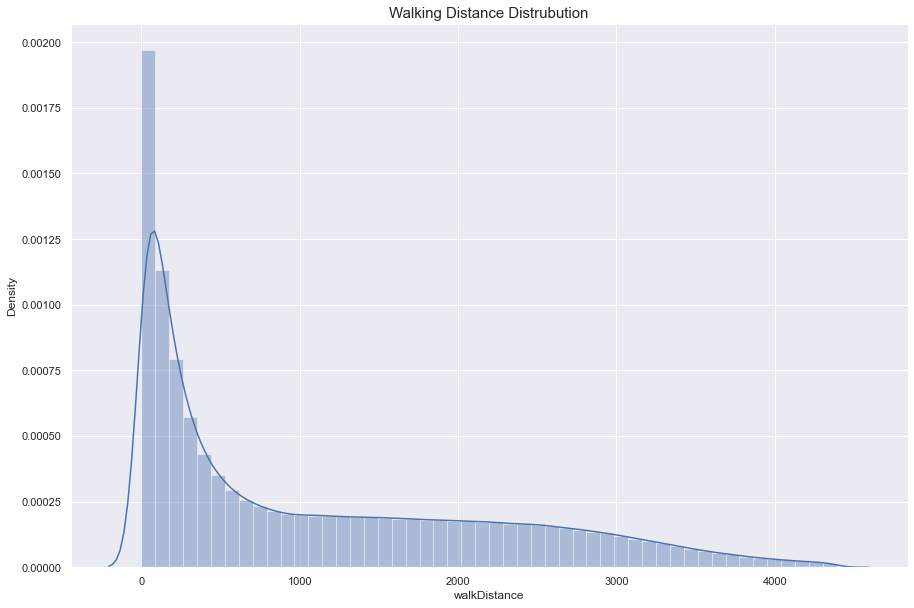

In [9]:
data=df.copy()
data= data[data['walkDistance']<df['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title('Walking Distance Distrubution',fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

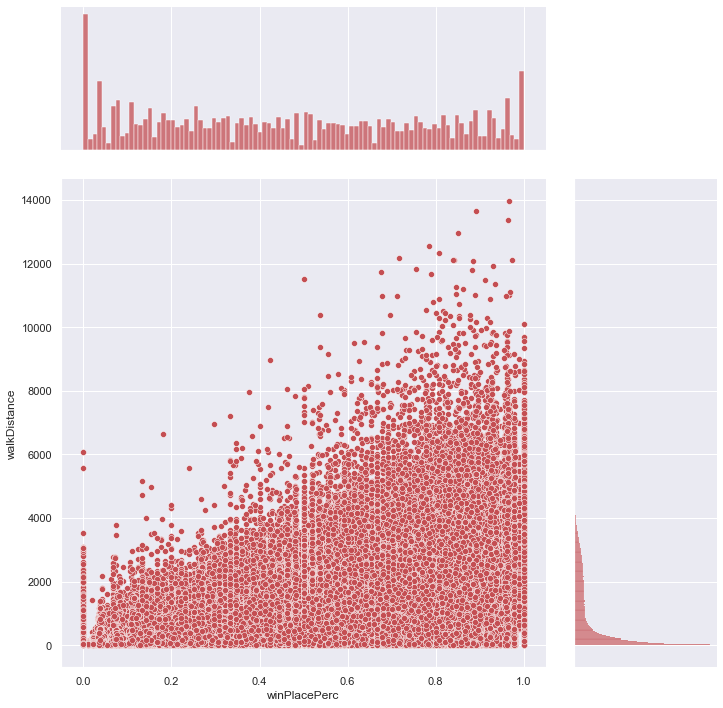

In [11]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=df, height=10, ratio=3, color="r")
plt.show()

In [ ]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=df, height=10, ratio=3, color="lime")
plt.show()

<IPython.core.display.Javascript object>

# observation:

In [ ]:
# There is a small correlation between rideDistance and winPlacePerc.